In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

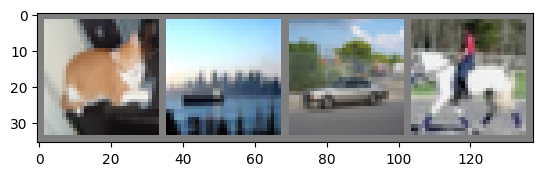

cat   ship  car   horse


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [37]:
import torch
import random
import numpy as np

def set_seed(seed: int = 42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f"Random seed set as {seed}")

set_seed(42)  # You can choose any integer as the seed


Random seed set as 42


In [38]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [49]:
dataiter = iter(trainloader)
images, labels = next(dataiter)

In [51]:

optimizer.zero_grad()

# forward + backward + optimize
outputs = net(images)
loss = criterion(outputs, labels)
loss.backward()
for p in net.parameters():
    print(p.grad)

tensor([[[[  5.6860,   6.0843,   6.8943,   8.0031,   8.6463],
          [  4.2896,   4.7901,   5.6636,   6.7681,   7.7799],
          [  2.8426,   3.2791,   4.4582,   5.8274,   6.9619],
          [  0.7973,   1.3764,   2.5481,   3.8877,   5.1515],
          [ -1.8233,  -0.8646,   0.2668,   1.2043,   2.2836]],

         [[  6.0265,   6.2462,   6.9489,   8.1154,   8.8870],
          [  4.8953,   5.1404,   5.8281,   6.9090,   8.0306],
          [  3.7219,   3.8720,   4.8328,   6.1307,   7.2777],
          [  1.9910,   2.3002,   3.2447,   4.4350,   5.6776],
          [ -0.1067,   0.6070,   1.4910,   2.1867,   3.1757]],

         [[ 10.4207,  10.4724,  10.8305,  11.5129,  11.8518],
          [  8.8477,   8.8912,   9.2472,   9.9030,  10.6682],
          [  7.2970,   7.2482,   7.9223,   8.8284,   9.6174],
          [  5.3197,   5.4302,   6.1564,   7.0392,   7.8972],
          [  2.9933,   3.5269,   4.2208,   4.6665,   5.2588]]],


        [[[ -5.9518,  -4.3911,  -3.0754,  -2.3468,  -2.0724],


In [8]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.181
[1,  4000] loss: 1.885
[1,  6000] loss: 1.698
[1,  8000] loss: 1.588
[1, 10000] loss: 1.507
[1, 12000] loss: 1.469
[2,  2000] loss: 1.399
[2,  4000] loss: 1.378
[2,  6000] loss: 1.375
[2,  8000] loss: 1.323
[2, 10000] loss: 1.305
[2, 12000] loss: 1.292
Finished Training


In [45]:
PATH = './cifar_net.pt'
torch.save(net.state_dict(), PATH)

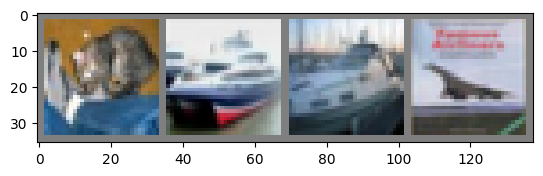

GroundTruth:  cat   ship  ship  plane


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [11]:
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

<All keys matched successfully>

In [12]:
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  car   plane


In [14]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


In [15]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 51.2 %
Accuracy for class: car   is 68.1 %
Accuracy for class: bird  is 39.5 %
Accuracy for class: cat   is 42.1 %
Accuracy for class: deer  is 58.6 %
Accuracy for class: dog   is 37.6 %
Accuracy for class: frog  is 71.5 %
Accuracy for class: horse is 60.3 %
Accuracy for class: ship  is 64.6 %
Accuracy for class: truck is 63.5 %
